# 3D surface plot test

Pick a promising set of RNAs/genes to test the dual-input logic gate.

We choose the output RNA to be RNU6-277P, the RNA with the most as-output logic gates in the cohort.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import time
import sys
sys.path.append("../")
from biologiclib.modelBase import *
from biologiclib.plotUtils import *
from biologiclib.inference import *

from rm_outlier import*

%matplotlib inline

In [2]:
# load expression matrix

h9_exp_mat = pd.read_csv("../data/GSE75748/h9_imputed.tsv",
                         sep = "\t", index_col = 0)
h9_exp_mat.head()

,SRR2977655,SRR2977656,SRR2977657,SRR2977658,SRR2977659,SRR2977660,SRR2977661,SRR2977662,SRR2977663,SRR2977664,...,SRR2977807,SRR2977808,SRR2977809,SRR2977810,SRR2977811,SRR2977812,SRR2977813,SRR2977814,SRR2977815,SRR2977816
ENSG00000000003.14,5.333434,5.401781,5.770235,4.661787,6.163233,5.538727,5.245607,5.342846,5.332342,4.015143,...,5.051099,5.530516,3.392994,5.732665,5.679862,5.603962,5.248733,5.265112,5.444956,3.658732
ENSG00000000005.5,0.405174,1.249968,0.382527,0.368489,0.392334,0.368489,1.645401,0.405174,0.504082,3.131879,...,0.535048,0.719265,0.152943,3.743526,0.602072,3.538463,0.656286,0.690559,3.039113,0.749957
ENSG00000000419.12,4.204045,3.092342,4.310163,4.536766,4.014042,3.381379,4.406172,4.118315,3.951724,3.695306,...,4.643275,3.100543,5.333091,3.417602,4.386976,4.655274,3.856929,4.388999,2.256160,3.578839
ENSG00000000457.13,1.803950,1.249416,0.319675,2.135601,0.757774,2.427578,1.309815,1.590746,3.693367,3.055467,...,3.639198,1.283812,0.285568,0.113242,0.137654,0.535571,3.729450,0.213661,5.374394,0.170811
ENSG00000000460.16,3.753187,0.244273,0.172557,4.943733,4.321864,4.409670,3.152386,3.976263,2.295498,4.773156,...,3.844763,0.964174,4.893142,4.961760,2.728839,4.073061,2.138180,4.200864,3.579143,2.512359


In [3]:
id_reporter = "ENSG00000136883.12"    # KIF12
id_inducer = ("ENSG00000235910.1", "ENSG00000141431.9")    # APOA1-AS, ASXL3
symbol_inducer = ("APOA1-AS", "ASXL3")
symbol_reporter = "KIF12"


Best model keywords: ['NAND']
Best model AIC: -1126.0508329331815
Best model parameters: {'K_1': 0.04897555085402082, 'K_2': 0.08017097021991117, 'n_1': 0.9825561556588958, 'n_2': 0.5882629349871782, 'alpha_2': 0.5056512648995379, 'alpha_3': -0.07799194380734503, 'alpha_4': 0.00044805128423368995}
Time elapse: 2.634986162185669


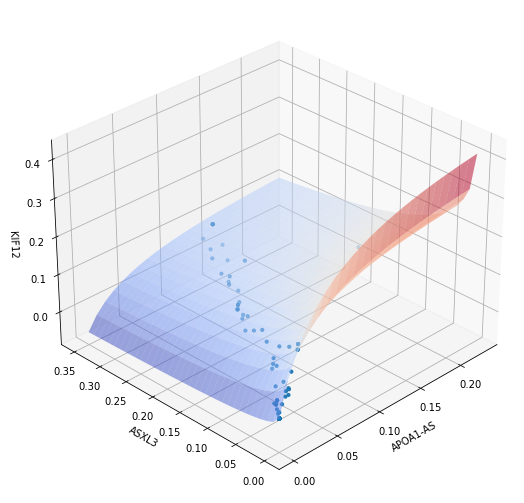

In [5]:
# scatter plot

count_x_all = (h9_exp_mat.loc[id_inducer[0]].to_numpy(),
               h9_exp_mat.loc[id_inducer[1]].to_numpy())
count_y_all = h9_exp_mat.loc[id_reporter].to_numpy()
# plot
count_x = [0.0, 0.0]
count_x[0], count_x[1], count_y = remove_outliers_3d(*count_x_all, count_y_all)

# fitting
count_x = np.array(count_x).transpose()    # convert to column vectors
start_time = time.time()
best_model, all_models = selectModel(count_x,
                            count_y,
                            modelSolver = ModelSolver.SLSQP,
                            modelSet = ModelSet.Dual_Input,
                            parallel = False,
                            quiet = True)
elapsed = time.time() - start_time
best_model_specs = [spec.name for spec in best_model.modelSpecs]
print("Best model keywords:", best_model_specs)
print("Best model AIC:", best_model.IC)
print("Best model parameters:",
      {key: val for key, val in zip(best_model.thetaKey, best_model.thetaVal)})
print("Time elapse:", elapsed)

# plot
fig = plt.figure(figsize = (12, 9))
ax = fig.gca(projection = "3d")
plotHelper3D(count_x,
        count_y,
        best_model,
        ax = ax,
        inducer_name = symbol_inducer,
        reporter_name = symbol_reporter,
        logScale = False)
